# 자연어 처리 개요

- 텍스트 분류
- 텍스트 유사도
- 텍스트 생성
- 기계 이해



## 단어표현

자연어 처리는 컴퓨터가 인간의 언어를 이해하고 분석 가능한 모든 분야를 말한다.
따라서 자연어 처리의 가장 기본적인 문제는 '어떻게 자연어를 컴퓨터에게 인식시킬 수 있을까?'다.
우선 컴퓨터가 텍스트를 인식하는 기본적인 방법을 알아보자.
컴퓨터는 텍스트뿐만 아니라 모든 값을 읽을 때 이진화된 값으로 받아들인다.
즉, 0, 1로만 구성된 값으로 인식할 수 있는데, 텍스트는 그중 "유니코드"라는 방법 혹은 영어의 경우 "아스키 코드"라는 방식을 통해 인식할 수 있다.
먼저 유니코드의 경우 어떻게 인식하는지 알아보자.
"언어"라는 텍스트를 유니코드 방식으로 컴퓨터가 인식한다면 다음과 같은 형태로 입력된다.

- '언' : 1100010110111000
- '어' : 1100010110110100

두 글자를 위와 같이 이진화된 값으로 인식하는데, 자연어 처리에 이러한 방식을 그대로 사용하기에는 문제가 있다.
문자를 이진화한 값의 경우 언어적인 특성이 전혀 없이 컴퓨터가 문자를 인식하기 위해 만들어진 값이므로 자연어 처리를 위해 만드는 모델에 적용하기에는 부적합하다.
그렇다면 어떤 방식으로 텍스트를 표현해야 자연어 처리 모델에 적용할 수 있을까?

이러한 질문의 답을 찾는 것이 "단어 표현" 분야다.
텍스트를 자연어 처리를 위한 모델에 적용할 수 있게 언어적인 특성을 반영해서 단어를 수치화하는 방법을 찾는 것이다.
그리고 이렇게 단어를 수치화할 때는 단어를 주로 벡터로 표현한다.
따라서 단어 표현은 "단어 임베딩" 또는 "단어 벡터"로 표현하기도 한다.
단어 표현에는 다양한 방법이 있고 계속해서 연구되는 분야이기 때문에 하나의 정답이 있는 것은 아니지만 이 책에서는 많이 사용하는 방법 위주로 하나씩 알아가보자.

단어를 표현하는 가장 기본적인 방법은 원-핫 인코딩 방식이다.
단어를 하나의 벡터로 표현하는 방법인데, 각 값은 0 혹은 1만 갖는다.
즉, 각 단어는 0과 1값만 가지는 벡터로 표현되는데, 이름에서 알 수 있는 벡터 값 가운데 하나만 1이라는 값을 가지고 나머지는 모두 0 값을 가지는 방식이다.
여기서 1이 되는 것은 갓 단어가 어떤 단어인지 알려주는 인덱스가 된다.

예를 들어, 6개의 단어(남자, 여자, 엄마, 아빠, 삼촌, 이모)를 알려줘야 한다고 했을 때 원-핫 인코딩 방식으로 각 단어를 표현한다고 해보자.
이때 각 단어를 표현하는 벡터의 크기는 6이 된다.
따라서 각 단어의 벡터는 총 6개의 값을 가지는데, 이 중에서 하나만 1이 된다.
이때 1이 되는 값을 통해 각 단어가 어떤 단어인지 알 수 있다.
아래의 그림과 같이 남자는 \[1, 0, 0, 0, 0, 0\]으로, 여자는 \[0, 1, 0, 0, 0, 0\]으로, 엄마는 \[0, 0, 1, 0, 0, 0\]으로, 아빠는 \[0, 0, 0, 1, 0, 0\]으로, 삼촌은 \[0, 0, 0, 0, 1, 0\]으로, 이모는 \[0, 0, 0, 0, 0, 1\]로 표현된다.

즉, 원-핫 인코딩 방식은 각 단어의 인덱스를 정한 후 각 단어의 벡터에서 그 단어에 해당하는 인덱스의 값을 1로 표현하는 방식이다.
방법 자체가 매우 간단하고 이해하기도 쉽다는 장점이 있다.
하지만 이 방식에는 결정적인 두 가지 문제점이 있다.
위의 예시에서는 총 6개의 단어만 표현하면 되지만 실제로 자연어 처리 문제를 해결할 때는 수십만, 수백만 개가 넘는 단어를 표현해야 한다.
이 경우에는 각 단어 벡터의 크기가 너무 커지기 때문에 공간을 많이 사용하고, 큰 공간에 비해 실제 사용하는 값은 1이 되는 값 하나뿐이므로 매우 비효율적이다.
또 다른 문제점은 이러한 표현 방식은 단순히 단어가 뭔지만 알려 줄 수 있고, 벡터값 자체에는 단어의 의미나 특성 같은 것들이 전혀 표현되지 않는다는 것이다.

따라서 이러한 원-핫 인코딩 방식의 문제점인 단어 벡터의 크기가 너무 크고 값이 희소하다는 문제와 단어 벡터가 단어의 의미나 특성을 전혀 표현할 수 없다는 문제를 해결하기 위해 다른 인코딩 방법들이 제안됐다.
즉, 벡터의 크기가 작으면서도 벡터가 단어의 의미를 표현할 수 있는 방법들인데, 이러한 방법들은 **분포 가설**을 기반으로 한다.
분포 가설이란 "같은 문맥의 단어, 즉 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다"라는 개념이다.
따라서 어떤 글에서 비슷한 위치에 존재하는 단어는 단어 간의 유사도가 높다고 판단하는 방법인데, 크게 두 가지 방법으로 나뉜다.

특정 문맥 안에서 단어들이 동시에 등장하는 횟수를 직접 세는 방법인 **카운터 기반 방법**과 신경망 등을 통해 문맥 안의 단어들을 예측하는 방법인 **예측 방법**으로 나뉜다.
이어서 이 두 가지 분류에 대해 어떤 단어 표현 방법이 있는지 알아보고, 어떤 방식으로 단어를 표현하는지 알아보자.

### 카운트 기반 방법

카운트 기반 방법으로 단어를 표현한다는 것은 어떤 글의 문맥 안에 단어가 동시에 등장하는 횟수를 세는 방법이다.
여기서 동시에 등장하는 횟수를 동시 출현 혹은 공기라고 부르고 영어로는 Co-occurrence라고 한다.
카운트 기반 방법은 기본적으로 동시 등장 횟수를 하나의 행렬로 나타낸 뒤 그 행렬을 수치화해서 단어 벡터로 만드는 방법을 사용하는 방식이다.

- 특이값 분해(Singular Value Decomposition, SVD)
- 잠재의미분석(Latent Semantic Analysis, LSA)
- Hyperspace Analogue to Language(HAL)
- Hellinger PCA(Principal Component Analysis)

위의 방법은 모두 동시 출현 행렬(Co-occurrence Matrix)을 만들고 그 행렬들을 변형하는 방식인데,
이 책에서는 동시 출현 행렬까지만 만들어 보고 행렬을 통해 다시 단어 벡터로 만드는 방법에 대해서는 다루지 않는다.

다음 예시를 가지고 동시 출현 행렬을 만들어 보자

- 성진과 창욱은 야구장에 갔다.
- 성진과 태균은 도서관에 갔다.
- 성진과 창욱은 공부를 좋아한다.

위의 문장들을 가지고 동시 출현 행렬을 만들려면 같은 문장 안에 단어가 함께 출현한 횟수를 센 후 다음과 같은 행렬을 만들면 된다.

|-|성진과|창욱은|태균은|야구장에|도서관에|공부를|갔다.|좋아한다.|
|-|-|-|-|-|-|-|-|-|
|성진과|0|2|1|0|0|0|0|0|
|창욱은|2|0|0|1|0|1|0|0|
|태균은|1|0|0|0|1|0|0|0|
|야구장에|0|1|0|0|0|0|1|0|
|도서관에|0|0|1|0|0|0|1|0|
|공부를|0|1|0|0|0|0|0|1|
|갔다.|0|0|0|1|1|0|0|0|
|좋아한다.|0|0|0|0|0|1|0|0|

이렇게 만들어진 동시 출현 행렬을 토대로 특이값 분해 방법 등을 사용해 단어 벡터를 만들면 된다.
이러한 카운트 기반 방법은 장점은 우선 빠르다는 점이다.
여기서 말하는 '빠르다'는 것은 우리가 만들어야 할 단어 벡터가 많아질수록 사용하는 방법에 따라 시간이 많이 소용되는데,
이러한 방식의 장점은 적은 시간으로 단어 벡터를 만들 수 있다는 것이다.
그리고 이러한 방식은 예측 방법에 비해 좀 더 이전에 만들어진 방법이지만 데이터가 많을 경우에는 단어가 잘 표현되고 효율적이어서 아직까지도 많이 사용하는 방법이다.

### 예측 방법

예측 기반 방법이란 신경만 구조 혹은 어떠한 모델을 사용해 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어를 벡터로 만드는 방식이다.
예측 방법에는 다음과 같은 것이 있다.
- Word2vec
- NNLM(Neural Network Language Model)
- RNNLM(Recurrent Neural Network Language Model)

여러 예측 기반 방법 중에서 단어 표현 방법으로 가장 많이 사용 되는 `Word2vec`에 대해 자세히 알아보자.
`Word2vec`은 CBOW 와 Skip-Gram이라는 두 가지 모델로 나뉜다.
두 모델은 각각 서로 반대되는 개념으로 생각하면 되는데, CBOW의 경우 어떤 단어를 문백 안의 주변 단어들을 통해 예측하는 방법이다.
반대로 Skip-Gram의 경우에는 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법이다.

예시를 들어 비교해 보자. 다음과 같은 문장이 있다고 하자.

- 창욱은 냉장고에서 음식을 꺼내서 먹었다.

이때 CBOW는 주변 단어를 통해 하나의 단어를 예측하는 모델이다.
즉, 다음 문장의 빈칸을 채우는 모델이라고 생각하면 된다.

- 창욱은 냉장고에서 \_\_\_ 꺼내서 먹었다.

반대로 Skip-Gram은 하나의 단어를 가지고 주변에 올 단어를 예측하는 모델이다.
다음 문장에서 빈칸을 채운다고 생각하면 된다.

- \_\_\_ \_\_\_\_\_ 음식을 \_\_\_ \_\_\_\_

두 모델은 위와 같이 단어들을 예측하면서 단어 벡터를 계속해서 학습한다.
모델의 전체적인 구조는 다음 그림과 같다.

<img src="cbow-skip-gram.png" alt="cbow-skip-gram" style="width: 500px;" />

각 모델의 학습 방법에 대해 설명하면 CBOW의 경우 다음과 같은 순서로 학습한다.

1. 각 주변 단어들을 원-핫 벡터로 만들어 입력값으로 사용한다(Input Layer Vector).
2. 가중치 행렬을 각 원-핫 벡터에 곱해서 n-차원 벡터를 만든다(N-Dimension Hidden Layer).
3. 만들어진 n-차원 벡터를 모두 더한 후 개수로 나눠 평균-n 차원 벡터를 만든다(Output Layer Vector).
4. n-차원 벡터에 다시 가중치 행렬을 곱해서 원-핫 벡터와 같은 차원의 벡터로 만든다.
5. 만들어진 벡터를 실제 예측하려고 하는 단어의 원-핫 벡터와 비교해서 학습한다.

Skip-Gram의 학습 방법도 비슷한 과정으로 진행한다.

1. 하나의 단어를 원-핫 벡터로 만들어서 입력값으로 사용한다(Input Layer Vector).
2. 가중치 행렬을 원-핫 벡터에 곱해서 n-차원 벡터를 만든다(N-Dimension Hidden Layer).
3. n-차원 벡터에 다시 가중치 행렬을 곱해서 원-핫 벡터와 같은 차원의 벡터로 만든다(Output Layer Vector).).
4. 만들어진 벡터를 실제 예측하려고 하는 단어의 원-핫 벡터와 비교해서 학습한다.

두 모델의 학습 과정이 비슷해 보이지만 확실한 차이점이 있다.
CBOW에서는 입력값으로 여러 개의 단어를 사용하고, 학습을 위해 하나의 단어와 비교한다.
Skip-Gram에서는 입력값이 하나의 단어를 사용하고, 학습을 위해 주변의 여러 단어와 비교한다.

위의 학습 과정을 모두 끝낸 후 가중치 행렬의 각 행을 단어 벡터로 사용한다.
이처럼 Word2vec의 두 모델은 여러 가지 장점이 있다.
기존의 카운트 기반 방법으로 만든 단어 벡터보다 단어 간의 유사도를 잘 측정한다.
또 한 가지 장점은 단어들의 복잡한 특징까지도 잘 잡아낸다는 점이다.
마지막으로 이렇게 만들어진 단어 벡터는 서로에게 유의미한 관계를 측정할 수 있다는 점인데,
예를 들어 4개의 단어(엄마, 아빠, 여자, 남자)를 word2vec 방식을 사용해 단어 벡터로 만들었다고 하자.
이때 다음 그림과 같이 '엄마'와 '아빠'라는 다언의 벡터 사이의 거리와 '여자'와 '남자'라는 단어의 벡터 사이의 거리가 같게 나온다.

Word2vecDML CBOW와 Skip-Gram 모델 중에서는 보통 Skip-Gram이 성능이 좋아 일반적인 경우 Skip-Gram을 사용한다.
하지만 절대적으로 항상 좋은 것은 아니니 두 가지 모두 고려할 만하다.


이처럼 카운트 기반 방법과 예측 기반 방법을 통해 단어 벡터를 표현하는데, 보통의 경우 예측 기반 방법의 성능이 좋아서 주로 예측 기반 방법을 사용한다.
그리고 두 가지 방법을 모두 포함하는 "Glove" 라는 단어 표현 방법 또한 자주 사용한다.

단어 표현은 모든 자연어 처리 문제를 해결하는 데 기반이 되는 가장 근본적인 내용이므로 정확하게 이해해야 한다.
그리고 항상 가장 좋은 성능을 내는 유일한 방법이 있는 것이 아니라서 각 방법 간에 어떤 차이점이 있는지 항상 염두해 두고 상황에 맞게 사용하는 것이 중요하다.

### 텍스트 분류

### 스팸 분류

누든 메일함에 들어갈 때마다 넘치는 스팸메일 때문에 짜증났던 기억이 분명히 있을 것이다.
계속해서 들어오는 스팸 메일 때문에 정작 필요한 메일은 확인하기 어려워진다.
따라서 자동으로 스팸 메일을 걸럿 사용자에게 일반 메일만 확인할 수 있게 보여주는 것이 중요할 것이다.
이처럼 일반 메일과 스팸 메일을 분류하는 문제가 스팸 분류 문제다.

여기서 분류해야 할 범주는 스팸 메일과 일반 메일로 2가지다.
이러한 스팸 분류 기술들은 이미 많은 이메일 업체에서 제공하고 있다.

### 감정 분류

감정 분류란 주어진 글에 대해 이 글이 긍정적인지 부정적인지 판단하는 문제다.
이 경우 범주는 긍정 혹은 부정이 된다.
경우에 따라 범주는 긍정 혹은 부정으로 나뉘는 것이 아니라 중립의 범주가 추가될 수도 있고, 긍정 혹은 부정의 경우에도 정도에 따라 범주를 세분화할 수 있다.
문제에서 분류하려는 의도에 따라 범주가 정해지는 것이다.
가장 대표적인 감정 분류 문제는 영화 리뷰에 대해 각 리뷰가 긍정적인지 부정적인지 판단하는 문제인데, 다음 장에서 자세히 설명하고 있으니 직접 분류를 해볼 수 있다.

### 뉴스 기사 분류
인터넷에는 수많은 뉴스가 존재한다.
뉵스가 많다는 것은 장점이지만 사용자 입장에서느 어떤 뉴스를 선택해서 봐야 할지도 어려울 것이다.
따라서 뉴스 업체는 사용자가 원하는 뉴스를 선택해서 볼 수 있게 범주를 잘 구분지어 분류해 둬야 할 것이다.
스포츠, 경제, 사회, 연예 등 다양한 주제의 기사를 각각 주체에 맞게 분류해서 준비해둬야 한다.
자연어 처리 기술을 사용한다면 뉴스 기사를 더욱 효율적으로 분류할 수 있다.

위의 예시뿐 아니라 텍스트 분류에는 다양한 문제가 있다.
분류하는 단위를 글 전체로 하지 않고 각 단어를 한 단위로 분류하는 문제도 있다.
예를 들면, 품사 분류(POS tagging) 문제는 각 단어를 기준으로 어떤 품사를 가지는지 분류해야 하는 문제다.

그렇다면 텍스트 분류 문제는 어떻게 해결해야 할까?
큰 기준으로 본다면 지도 학습을 통해 해결하거나 비지도 학습을 통해 해결할 수 있을 것이다.

### 지도 학습을 통한 텍스트 분류

지도 학습을 통해 문장 분류를 하는 전체적인 방법은 다음 그림과 같다.

<img src="https://inforience.net/wp-content/uploads/2021/02/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2021-02-09-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.53.52.png" style="width: 500px;"/>

위 그림과 같이 지도 학습은 글에 대해 각각 속한 범주에 대한 값이 이미 주어져 있다.
따라서 주어진 범주로 글들을 모두 학습한 후 학습한 결과를 이용해 새로운 글의 범주를 예측하는 방법이다.

예를 들어, 스팸 분류 문제를 지도 학습으로 해결한다고 해보자.
이 경우 10,000개의 메일 데이터가 있고, 이 메일 중 스팸 메일은 5,000개이고, 일반 메일이 5,000개디.
각 메일에는 해당 메일이 어떤 메일인지 라벨링돼 있다.
이제 각 메일에서 특징을 뽑아내서 예측한 뒤 라벨과 맞는지 확인하면서 학습한다.
10,000개의 메일을 모두 사용해서 학습한 뒤 이제 새로운 메일에 대해 학습한 모델을 통해 스팸 메일인지 아닌지 예측한다.

지도 학습을 통한 문장 분류 모델에는 다양한 종류가 있다.
대표적인 지도 학습의 예를 다음과 같다.

- 나이브 베이즈 분류
- 서포트 벡터 머신
- 신경망
- 선형 분류
- 로지스틱 분류
- 랜덤 포레스트

이 밖에도 수많은 모델이 있다. 해당 문제에 적합한 모델은 정해져 있는 것이 아니므로 항상 다양한 모델을 사용해 보는 습관을 길러야 한다.

### 비지도 학습을 통한 텍스트 분류

그러핟면 비지도 학습을 통한 문장 분류는 무엇일까?
지도 학습에서는 각 데이터가 어떤 범주의 데이터인지에 대한 값을 이미 가지고 있었다.
그래서 그 값을 토대로 모델을 학습시켰지만 비지도 학습에서는 데이터만 존재하고, 각 데이터는 범주가 미리 나눠져 있지 않다.
따라서 특징을 찾아내서 적당한 범주를 만들어 각 데이터를 나누면 된다.

대표적으로 비지도 학습의 예인 k-평균 군집화를 예로 들어 보자.
각 문장 데이터는 다음과 같이 벡터화한 뒤 좌표축에 표현한다.

이후 k-평균 군집화 모델을 사용해 데이터를 몇 개의 군집으로 나눈다.
여기서는 k값을 4로 지정한다.
군집화를 마친 후 각 데이터는 다음 그림과 같이 4개의 군집으로 나뉜다.

비지도 학습을 통한 분류는 어떤 특정한 분류가 있는 것이 아니라 데이터의 특성에 따라 비슷한 데이터끼리 묶어주는 개념이다.
위의 그림에서도 비슷하게 분포된 데이터끼리 총 4개의 묶음으로 나눠진 모습을 볼 수 있다.
이렇게 묶어준다면 각 묶음이 하나의 버무가 되는 것이다.

비지도 학습을 통한 텍스트 분류는 텍스트 군집화라고도 불린다.
비지도 학습 모델은 다음과 같다.

- k-평균 군집화
- 계층적 군집화

지도 학습과 비지도 학습 중 어떤 방법을 사용할지 결정하는 데 기여하는 가장 큰 기준은 데이터에 정답 라벨이 있느냐 없느냐다.
정답 라벨이 있는 경우 지도 학습 방법으로 문제를 해결하면 되고, 정답 라벨이 없다면 비지도 학습을 사용해서 문제를 해결하면 된다.
그리고 일반적인 분류의 경우에는 지도 학습을 사용하지만 정확한 범주가 없고 단순히 군집화만 할 경우에는 비지도 학습을 통해 데이터를 군집화하면 된다.

## 텍스트 유사도

- 이 노래 누가 만들었어?
- 지금 나오는 노래의 작곡가 누구야?

위 두 문장은 똑같은 의미이지만 인공지능 스피커에게는 단순하게 다른 문장으로 인식될  것이다.
따서 각기 다른 대답을 만들어야 하는데, 좀 더 효율성을 위해 비슷한 의미를 가진 문장에 대해서는 같은 대답을 준비할 수 있을 것이다.
이때 문장이 유사한지 측정해야 하며, 텍스트 유사도 측정 방법을 사용하면 된다.

텍스트 유사도란 말 그대로 텍스트가 얼마나 유사한지를 표현하는 방식 중 하나다.
앞에서 예로 든 두 문장의 경우 다른 구조의 문장이지만 의미는 비슷하기 때문에 두 문장의 유사도가 높다고 판단할 수 있다.
물론, 유사도를 판단하는 척도는 매우 주관적이기 때문에 데이터를 구성하기가 쉽지 않고 정량화하는 데 한계가 있다.
이를 최대한 정량화해서 모델을 만드는 것이 중요하다.

일반적으로 유사도를 측정하기 위해 정량화하는 방법에는 여러 가지가 있다.
단순히 같은 단어의 개수를 사용해서 유사도를 판단하는 방법, 형태소로 나누어 행태소를 비교하는 방법, 자?소 단위로 나누어 단어를 비교하는 방법 등 다양한 방법이 있다.

이번에는 그중에서도 딥러닝을 기반으로 텍스트의 유사도를 측정하는 방식을 주로 다룰 것이다.
단어, 형태소, 유사도의 종류에 상관 없이, 텍스트를 벡터화한 후 벡터화된 각 문장 간의 유사도를 측정하는 방식이다.

우선 각 유사도를 측정하기 전에 다음 두가지 예시 문장을 보자

- 휴일인 오늘도 서쪽을 중심으로 폭염이 이어졌는데요, 내일은 반가운 비 소식이 있습니다.
- 폭염을 피해서 휴일에 놀러왔다가 갑자스런 비로 인해 망연자실하고 있습니다.

이제 이 두 문장에 대해 각 유사도 측정 방법으로 유사도를 측정해 보겠다.
유선은 유사도 측정을 하기 전에 단어를 벡터화한다.
여기서는 TF-IDF를 통해 벡터화한다.

In [1]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.") 
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니': 1.4054651081081644, '있습니다': 1.4054651081081644, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


TF-IDF로 벡터화한 값은 자카드유사도를 제외한 유사도 측정에 모두 사용할 것이다.
자카드 유사도의 경우 벡터화 없이 바로 유사도 측정이 가능하다.

### 자카드 유사도

저카드 유사도, 또는 자카드 지수는 두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식 중 하나다.
유사도를 측정하는 방법은 두 집합의 교집합인 공통된 단어의 개수를 두 집합의 합집합, 즉 전체 단어의 수로 나누면 된다.
결괏값은 공통의 원소의 개수에 따라 0과 1 사이의 값이 나올 것이고, 1에 가까울수록 유사도가 높다는 의미다.
다음 수식은 자카드 유사도를 나타내는 수식인데, A와 B는 각 문장을 의미하고, token은 각 단어를 의미한다.

$$
J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|token\ in\ A \cap token\ in\ B|}{|token\ in\ A \cup token\ in\ B|}
$$

앞에서 제시한 두 예시 문장을 통해 자카드 유사도를 측정해보자.
유사도를 측정할 때 단어에서 조사는 따로 구분해서 사용하므로 두 문장 A, B는 다음과 같이 정의될 것이다.

A = {휴일, 인, 오늘, 도 , 서쪽, 을, 중심, 으로, 폭염, 이, 이어졌는데요, 내일, 은, 반가운, 비, 소식, 있습니다.}
B = {폭염, 을, 피해서, 휴일, 에, 놀러왔다가, 갑자스런, 비, 로, 인해, 망연자실, 하고, 있습니다.}

두 집합을 벤다이어그램으로 그리면 다음과 같다.

자카ㅡ드 공식에 위의 예제를 대입해 본다면 두 문장 A, B의 교집합 개수는 6개, A와 B의 합집합 개수는 24(6+11+7)이므로 자카드 유사도는
$$
\frac{6}{24} \approx 0.25
$$
다

### 코사인 유사도

코사인 유사도는 두 개의 벡터값에서 코사인 각도를 구하는 방법이다.
코사인 유사도 값은 -1과 1 사이의 값을 가지고 1에 가까울수록 유사하다는 것을 의미한다.
코사인 유사도는 유사도를 계산할 떄 가장 널리 쓰이는 방법 중 하나다.
다른 유사도 접근법에 비해 일반적으로 성능이 좋은데, 이는 다순히 좌표상의 거리를 구하는 다른 유사도 측정 방법에 비해 코사인 유사도는 말 그대로 두 벡터 간의 각도를 구하는 것이라서 방향성의 개념이 더해지기 때문이다.
두 문장이 유사하다면 같은 방향으로 가리킬 것이고, 유사하지 않을수록 직교로 표현될 것이다.

$$
\cos (\theta) = \frac{\vec a \cdot \vec b}{\lVert\vec a\lVert \cdot \lVert\vec b\lVert}
$$

앞서 TF-IDF로 벡터화한 문장을 사용해 코사인 유사도를 구해보자.
코사인 유사도의 경우 직접 함수를 구현할 필요 없이 사이킷런에서 유사도 측정을 위한 함수를 제공한다.

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.11304078]])

### 유클리디언 유사도

유클리디언 유사도는 가장 기본적인 거리를 측정하는 유사도 공식이며, 공식은 다음과 같다.

$$
d(x,y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 +\ ...\ + (x_n - y_n)^2}
$$

여기서 구하는 거리는 유클리디언 거리 혹은 L2 거리라고 불리며, n차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법이다.
일반적으로 중고등학교 수학 과정에서 배우는 두 점 사이의 거리를 구하는 방식이 유클리디언 거리를 뜻한다.

유클리디언 유사도를 구해보자, 사이킷런에서 제공하는 유클리디언 거리 측정 함수를 사용하면 된다.

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.33188529]])

앞서 확인했던 유사도 방식들은 모두 0과 1 사이의 값을 가졌는데, 유클리디언 유사도는 1보다 큰 값이 나왔다.
일반적으로 유클리디언 유사도는 단순히 두 점 사이의 거리를 뜻하기 때문에 값에 제한이 없다.
따라서 크기는 계속해서 커질 수 있다.

이러한 제한이 없는 유사도 값은 사용하기 어렵기 때문에 값을 제한해야 한다.
여기서는 앞선 유사도 측정 방식과 동일하게 0과 1 사이의 값을 갖도록 만들어 줄 것이다.
앞서 각 문장을 벡터화했었는데, 이 벡터를 일반화한 후 다시 유클리디언 유사도를 측정하면 0과 1 사이의 값을 갖게 된다.
여기서는 L1 정규화 방법을 사용하겠다.
L1 정규화 방법에 대해 간단히 설명하면 각 벡터 안의 요소 값을 모두 더한 것이 크기가 1이 되도록 벡터들의 크기를 조절하는 방법이다.
즉, 벡터의 모든 값을 더한 뒤 이 값으로 각 베터의 값을 나누면 된다.
L1 정규화를 새로운 함수로 정의하고 다시 유클리디언 유사도를 측정해보자.

In [4]:
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.21243357]])

정규화한 후 유클리디언 유사도를 측정한 결과는 0.2로서 0보다 크고 1 보다 작은 값이 나왓다.
유클리디언 유사도를 측정할 때는 편의를 위해 정규화한 후 측정하는 방법도 있다는 점을 기억하자.

### 맨하탄 유사도

맨하탄 유사도는 맨하탄 거리를 통해 유사도를 측정하는 방법이다.
맨하탄 거리란 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식이다.
유클리디언 거리를 L2 거리라고 부르는 반면 맨하탄은 L1 거리라고 부른다.
다음은 맨하탄 거리를 구하는 공식이다.

$$
MaDistance = \sum_{i=1}^n |a_i - b_i|
$$

위의 그림을 봤을 때 유클리디언 거리는 검은색 선을 의미한다.
다만 검은색 선은 도로와 도로 사이에 아무런 장애물이 없다고 가정한 것이기 때문에 현실성이 없다.
가장 적합한 맨하탄 거리는 빨간색을 의미하며, 도로를 감안해서 가장 짧은 거리의 길이라고 생각하면 된다.

맨하탄 유사도 또한 유클리디언 유사도와 마찬가지로 거리를 통해 유사도를 측정하는 방법이라 값이 계속해서 커질 수 있다.
따라서 0과 1 사이의 값을 갖도록 L1 정규화 방법을 사용해 벡터 안의 요소 값을 정규화한 뒤 유사도를 측정한다.

In [5]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[5.37022233]])

맨하탄 유사도로 측정했을 때 유사도가 가장 높게 나왔다.
측정 방법에 따라 크게 유사도가 달라질 수 있으므로 하는 방향에 맞는 유사도 측정 방법을 고르는 것이 매우 중요하다.

## 자연어 생성

언어 생성이란 무엇일까?
사람이 언어를 생성하는 과정을 생각해보자.
일반적으로 글을 쓰거나 말을 할 때 어떠한 주제에 대한 목적 의식을 가지고 언어에 맞는 문법과 올바른 단어를 사용해 문장을 생성한다.
신문 기사가 될 수도 있고, 상대방과의 대화, 문장 요약 등 언어를 활용해 우리는 서로 "소통"하면서 살아간다.
그렇다면 컴퓨터가 상대방의 대화를 이해하고, 글도 쓴다면 어떨까?
로봇에게만 적용해도 우리의 삶은 현재와는 다른 세상이 될 것이다.
실제로 기술이 진보하면서 이와 관련된 사례들이 조금씩 나오고 있다.

미국 캘리포니아 LA Times에서는 "Quakebot"이 인공지능으로 지진이 난 지 3분만에 기사를 작성했다.
아래 기사의 내용을 보면 지진이 난 경과와 날짜, 일어난 위치를 정확하게 설명하고 있고,
맨 마지막 문장은 "this post was created by an alogorithm written by the author."라고 나와 있는데,
이 기사가 인공지능 알고리즘으로 작성된 기사라는 것을 의미한다.
다음은 실제 인고지능이 작성한 기사 원문이다.

```
A shallow magnitude 4.7 earthquake was reported Monday morning five miles from Westwood, California, according to the U.S. Geological Survey. The temblor occurred at 6:25 a.m. Pacific time at a depth of 5.0 miles.

According to the USGS, the epicenter was six miles from Beverly Hills, California, seven miles from Universal City, California, seven miles from Santa Monica, California and 348 miles from Sacramento, California. In the past ten days, there have been no earthquakes magnitude 3.0 and greater centered nearby.

This information comes from the USGS Earthquake Notification Service and this post was created by an algorithm written by the author.
```

하지만 이런 사실 기반의 기사를 제외하고 일반적으로 감정 및 논리력이 들어가는 기사를 작성하는 데는 아직까지 한계가 있어서 보조 도구로 쓰이고 있는 상태이며,
관련 영역에 해당하는 많은 데이터가 필요하다.

컴퓨터는 0과 1로 이뤄져 있다.
따라서 감정이나 논리 같은 숫자로 정량화하기 어려운 내용이 포함된 문장에 대해서는 아직까지는 컴퓨터가 작성하기 어렵지만 사실 기반의 기록에는 충분히 효과적이다.
예를 들어, 비즈니스에 관해 분석한 결과를 글로 표현하거나, 이메일이나 문자의 내용을 보고 자주 쓰는 답변으로 답하거나,
일반 가전기기가 고장 났을 때 고장 내용을 작성해주는 등 활용할 가치가 많다.

언어 생성에 대해 자세한 내용은 이 책의 후반부의 챗봇 서비스에서 다룰 것이다.
언어 생성은 사람의 대화를 최대한 많이 수집해서 대화를 배우게 하고 지속적으로 평가하는 과정을 반복해서 특정 목적에 맞는 텍스트를 생성하는 것이 주 목적이다.
이 분야는 아직 많은 연구와 개척이 필요한 분야이다.
현재 언어 생성 기술을 활용해서 성공적으로 활용하는 분야 중 하나는 기계번역 분야다.
구글이나 네이버에서 끊임없이 서비스를 개선함에 따라 점점 언어의 장벽이 무너지고 있어 새로운 혁신으로 일컬어지는 분야 중 하나다.

## 기계 이해

기계 이해는 기계가 어떤 텍스트에 대한 정보를 학습하고 사용자가 질의를 던졌을 때 그에 대해 응답하는 문제다.
다시 말하자면 기계가 텍스트를 이해하고 논리적 추론을 할 수 있는지 데이터 학습을 통해 보는 것이다.

예를 들어, 기계한테 위와 같은 텍스트에 대한 내용을 학습시켰다고 하자.
그리고 "자연어 처리는 어느 분야 중 하나인가?"라는 텍스트와 관련이 있는 질문을 기계에게 한다.
그러면 기계는 위 텍스트의 내용을 토대로 추론해서 이에 대한 응답을 텍스트 내에서 하거나 정답 선택지를 선택하는 방식으로 답하게 된다.

이 문제는 앞서 설명한 자연어 처리에 대한 개념을 모두 활용한다고 봐도 무방하다.
우선 텍스트와 질의에 대한 정보를 알기 위해서는 각 문장의 의미 벡터를 추출할 수 있어야 한다.
이 경우에는 단어 표현 벡터를 활용해 문장의 의미를 표현하는 벡터를 추출할 수 있다.

그리고 텍스트와 질의에 대한 문장 정보 간의 관계가 어떠한지를 보기 위해 문장 유사도를 구하는 방식이 필요할 수 있다.
경우에 따라서는 반대로 질의 내용에 대한 정보를 기반으로 텍스트에 대한 언어 정보를 새롭게 생성하고자 할 수도 있는데
이 방식은 언어 생성 모델과 밀접한 관련이 있다.

또한 이런 질의 정보 데이터를 정리해서 질의한 내용에 대한 응답을 선택할 수 있게 정답에 대한 내용을 분류할 수도 있다.
이 경우 텍스트 분류 모델을 용용할 수 있다.

다음은 한 기계 이해 모델 중 하나인 메모리 네트워크를 통해 앞에서 설명한 자연어 처리 기술이 기계 이해에 어떻게 활용될 수 있는지 보여준다.

위의 내용은 BABI 데이터셋이라 불리는 기계 이해 학습을 위한 데이터셋 중 하나다.
이 데이터에는 각 문장에 대한 정보가 담겨있고, 그 정보에 관련된 질의를 던지게 된다.
이때 응답은 주어진 응답 선택지 안에서 선택할 수 있게 데이터가 구성돼 있다.
다음은 이러한 데이터를 가지고 어떻게 기계가 텍스트를 이해하고 질문의 답을 추론할 수 있는지 도식화한 메모리 네트워크다.

<img src="MemoryNetwork.png" alt="MemoryNetwork" style="width: 500px;"/>

위 그림을 통해 메모리 네트워크의 개념에 대해 간단히 알아보면 우선 해당 모델은 입력값으로 질의를 입력했을 때 텍스트 정보를 통해 어떻게 답해줄 것인지를 본다.
우선은 정보를 주기 위한 문장들이 주어지는데 이 문장들을 앞에서 절에서 살펴본 단어 표현과 같은 방식으로 문장 표현 벡터를 만든다.
이후에 이 문장 벡터들을 모아서 두 개의 행렬로 만드는데, 이렇게 만든 행렬을 통해 질의와의 유사도를 측정한다.
이에 대한 방식은 다다음 장에서 더 살펴보도록 한다.
유사도를 측정한 후 유사도가 높은 정보에 대해 가중치를 줘서 출력을 만들어낸다.
이러한 과정을 학습시키면서 각 질의가 정보 문장 중 어떤 문장과 관련이 높은지,
그리고 문장 안에서도 어떠한 단어가 질의에 대한 답인지를 예측할 수 있게 한다.

위 메모리 네트워크의 사례를 보면 알 수 있듯이 기계 이해는 자연어 처리 기술에 대한 갠며이 총망라된 학습 태스크가 보면 된다.
그렇기 때문에 앞에서 알아본 다른 자연어 처리 태스크와 비교하면 어렵고, 더욱 복잡한 모델링을 필요로 한다.
기계 이애는 아직 연구 단계에 있고 QA 태스크와 관련된 여러 대회를 통해 많은 모델들이 제시되고 있다.
이러한 대회 중 대표적으로 SQuAD를 사례로 들 수 있다.

### 데이터셋

기계 이해 태스크에서는 대체로 자연 언어를 이해하는 과제에서 기계가 텍스트 내용에 대해 추론을 잘 하는지 파악하는 목적에서 학습하게 된다.
그렇기 때문에 이 태스크를 QA 태스크라고 부르기도 하며 보통 Qustion Answering 형태의 데이터셋을 활용해 기계에서 학습하게 한다.
이러한 데이터셋은 위키피디아나 뉴스 기사를 가지고 데이터를 구성하면 대체로 텍스트와 지문, 정답 형태로 구성돼 있다.
여기서는 대표적으로 연구에서 활용하는 2개의 데이터셋을 다루겠다.

#### bAbI

바비 데이터셋은 페이스북 AI 연구팀에서 기계가 데이터를 통해 학습해서 텍스트를 이해하고 추론하는 목적에서 만들어진 데이터셋이다.
총 20가지 부류의 질문 내용으로 구성돼 있으며 질문 데이터셋 구성은 다음 그림과 같다.

<img src="babi.png" alt="babi" style="width: 500px"/>

위 그림과 같이 bAbI 데이터셋은 시간 순서대로 나열된 텍스트 문장 정보와 그에 대한 질문으로 구성되어 텍스트 정보에 대해 질문을 던지고 응답하는 형태다.
간단하게 한 데이터 사례를 들어 보자.
그림에서 Task 1에 해당하는 사례는 "Single Supporting Fact"라 해서 질문에 대한 답을 찾는데 한 개의 근거만 찾아 알 수 있게 하는 경우다.
여기서 질문은 "Where is Mary"인데, 그렇다면 이와 밀접하게 관련된 문장은 첫 번째 문장인 "Mary went to the bathroom"과 "Mary travelled to the office"다.
시간 순서상 맨 마지막에 있는 "Mary travelled to the office"를 보게 될 것이고,
Mary가 어디에 있는지를 물었으니 'office'라는 단어가 정답이 될 것이다.
이처럼 문장의 내용을 알 수 있어야 하고 논리적인 관계를 파악할 수 있어야 하는 데이터셋으로 20가지가 구성돼 있다.
bAbI의 경우 기계 모델이 사람이 문제를 풀었을 때보다 더 좋은 점수를 내면서 이미 해결된 부분으로 알려져 있다.

#### SQuAD

SQuAD는 기계 이해 태스크에서 가장 유명한 데이터셋 중 하나다.
스탠퍼드 자연어 처리 연구실에서 만들었으며 위키피디아에 있는 내용을 크라우드 소싱해서 QA 데이터셋으로 만들었다.
46개의 주제에 대해 약 10만 개의 질문 데이터셋으로 구성돼 있으며 인물, 시간, 장소, 이유 등 다양한 형태의 질문이 있다.
그뿐만 아니라 약 10만 개의 어휘와 짧은 텍스트에서부터 400단어가 넘는 긴 텍스트까지 다양한 길이의 지문을 포함하고 있어 상당히 어려운 분야로 손꼽힌다.

<img src="SQuAD.png" alt="SQuAD" style="width: 500px;" />

위 그림을 보면 "precipitation"에 대한 설명을 볼 수 있다.
주어진 텍스트에 대해 "What causes precipitation to fall"과 같은 질문이 제시된다.
이 질문의 답으로 텍스트 안에 있는 단어를 선택하게 한다.
이러한 데이터 구성 덕분에 이 데이터셋에 관한 모델링에서는 정답을 선택하고자 할 때 텍스트의 토큰 위치의 시작점과 끝점을 지정하도록 학습한다.
모델 학습에 대한 평가는 정답 위치에 완벽하게 일치하는지를 보는 EM(Exact Matching)점수와 정답 위치와 겹치는지를 보는 F1 점수를 통해 본다.

현재 이 데이터셋은 대회로 진행됐고 많은 모델링 연구가 이뤄져 EM 점수의 경우 사람이 문제를 푼 점수보다 높게 나온다.
현재는 SQuAD 2.0으로 새롭게 데이터셋을 구성해서 대회를 진행하고 있다.

#### Visual Question Answering(VQA)

앞서 설명한 내용은 기계가 텍스트 정보를 이해해서 질의를 던졌을 때 응답하는 학습으로 진행됐다.
만약 기계가 텍스트가 아닌 이미지를 이해하고 질의를 던지면 어떻게 될까?
Visual Question Answering(VQA)은 이미지에 대한 정보와 텍스트 질의를 통해 이미지 컨텐스트에 해당하는 응답을 알려주는 태스크다.

<img src="VisualQuestionAnswering.png" alt="VisualQuestionAnswering" style="width: 500px;" />

위 그림을 보면 바나나를 입 주변에 둔 사진이 있고 "What is the mustache made of?"라는 텍스트 질의가 나온다.
VQA에서는 이 두 정보를 'AI System'을 통해 'bananas'라는 답을 얻도록 학습해야 한다.
여기서 'AI System'은 머신러닝 또는 딥러닝 모델이라 보면 된다.

구체적인 AI System에 대해 설명하기 위해 다음 그림을 보자.
다음 그림은 실제 VQA를 풀고자 제안된 모델이다.
어떻게 이러한 태스크를 AI System이라는 것을 통해 해결할 수 있는지 간단한 예를 통해 살펴보겠다.

<img src="VisualQuestionAnswering2.png" alt="VisualQuestionAnswering2" style="width: 500px;" />

이 모델은 2개의 모델이 합쳐진 형태다.
하나는 Image Embedding이라는 모델로서 이미지에 대한 정보를 추출하는 모델이고,
아래는 Question Embedding이라는 질문 텍스트에 대한 정보를 추출하는 모델이다.
각 두 정보에 대해 모델을 통해 추출하고 난 후 두 정보를 조합해서 답을 추론하는 모델을 만들어 장답을 찾고자 한다.
이 같은 학습을 여러 데이터를 가지고 한다면 이미지 정보에 대해 질문하게 됐을 때 정답을 추론할 수 있는 인공지능 모델을 만들 수 있는 것이다.

현재 버지니아 공대와 조지아 공대에서 VQA Challenge를 통해 태스크를 모델링할 수 있게 데이터셋을 제공하고 있으며, 이 태스크 역시 연구가 진행 중이다.

## 데이터 이해하기

다음 장부터는 캐글 도전 및 모델링을 진행할 것이다.
처음 캐글 문제를 풀기 시작할 때 많은 사람들은 모델을 만들고 훈련 후에 성능을 평가하고,
생각보다 성능이 안 나온다면 모델에 문제가 있다고 판단하고 다른 모델을 사용한다.
이처럼 모델에 문제가 있는 경우도 있지만 우선적으로 해당 문제를 잘 해결하기 위해서는 데이터 이해가 선행돼야 한다.
이러한 과정을 탐색적 데이터 분석(EDA: Exploratory Date Analysis)이라 한다.
이러한 과정에서 생각지 못한 데이터의 여러 패턴이나 잠재적인 문제점 등을 발견할 수 있다.

그리고 문제를 해결하기 위한 모델에 문제가 없더라도 데이터마다 적합한 모델이 있는데 해당 모델과 데이터가 잘 맞지 않으면 좋은 결과를 얻을 수 없다.
즉, 아무리 좋은 모델이더라도 데이터와 궁합이 맞지 않는 모델이라면 여러 가지 문제에 직면하게 될 것이다.

그렇다면 탐색적 데이터 분석 과정은 어떻게 진행될까?
정해진 틀 없이 데이터에 대해 최대한 많은 정보를 뽑아내면 된다.
데이터에 대한 정보란 데이터의 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치 등이 있다.
이러한 값들을 확인하고 히스토그램, 그래프 등의 다양한 방법으로 시각화하면서 데이터에 대한 직관을 얻어야 한다.

데이터를 분석할 때는 분석가의 선입견을 철저하게 배제하고 데이터가 보여주는 수치만으로 분석을 진행해야 한다.
그리고 이러한 데이터 분석 과정은 모델링 과정과 서로 상호 작용하면서 결과적으로 성능에 영향을 주기 때문에 매우 중요한 작업이다.

<img src="탐색적데이터분석.png" alt="탐색적데이터분석" style="width: 500px;"/>

간단한 실습을 통해 데이터 분석에 대해 자세히 알아보자.
실습에 사용한 데이터는 영화 리뷰 데이터로, 리뷰와 그 리뷰에 해당하는 감정(금정, 부정) 값을 가진고 있다.
우선 실습에 사용할 라이브러리들을 불러오고 데이터를 불러오자.
데이터의 겨우 라이브러리를 사용해서 설치 할 수 있다.

|-|-|
|-|-|
|데이터 이름|acllmdb_v1|
|데이터 용도|탐색적 데이터 분석에 대해 알아보기 위한 목적이다.|
|데이터 권한|MIT|
|데이터 출처|http://ai.stanford.edu/~amaas/data/sentiment|

In [6]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True
)

텐서플로 케라스 모듈의 `get_file` 함수를 통해 IMDB 데이터를 가져온다.
두 번째 인자인 `origin`에 데이터의 URL을 넣으면 해당 URL에서 데이터를 다운로드하게 된다.
URL의 마지막 부분은 확장자인데 확장자가 `tar.gz`라는 것은 압축 파일임을 의미하다.
세 번째인 인자인 `extract`를 통해 다운로드한 압축 파일의 압축 해제 여부를 지정할 수 있다.
첫 번째 인자 frame은 다운로드한 파일의 이름을 재지정하는 부분이다.

판다스로 데이터를 불러오면 쉽게 데이터 분석 과정을 진행할 수 있다.
하지만 안타깝게도 판다스로 바로 가져올 수 없다.
그 이유는 풀린 데이터를 보면 알 수 있다.

모든 데이터가 디렉토리 안에 txt 파일 형태로 있어서 판다스의 데이터프레임을 만들기 위해서는 변환 작업을 진행해야 한다.
변환 작업에 필요한 함수 두 개를 만들어 보자.
하나는 각 파일에서 리뷰 텍스트를 불러오는 함수이며 다른 하나는 각 리뷰에 해당하는 라벨값을 가져오는 함수다.
우선 첫 번째 함수부터 정의해보자.

In [7]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

데이터를 가져올 디렉터리를 인자로 받는다.
디렉터리 안에 있는 파일들을 하나씩 가져와 그 안의 내용을 읽어서 data\["sentence"\] 배열에 하나씩 넣는다.
이를 다르게 말하면 딕셔너리 타입의 data에 추가하는 것이다.
그러고 나서 딕셔너리를 판다스 데이터프레임으로 만들어서 반환하다.

다음 함수는 폴더 이름을 지정하면 앞에서 설명한 `directory_data` 함수를 호출하는데 이때 `pos` 폴더에 접근할지 `neg` 폴더에 접근할지를 통해 각각의 데이터프레임을 반환한다.
이 값들은 `pos_df`와 `neg_df`에 담긴다.
`pos` 폴더와 `neg` 폴더의 의미는 각각 긍정 데이터와 부정 데이터를 나타내며, 특정 폴더의 값을 가져와 라벨 작업을 하고 있다.
긍정은 1, 부정은 0으로 만들고 데이터프레임을 통해 연동한다.

In [8]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

앞에서 설명한 두 함수를 호출해서 판다스 데이터프레임을 반환받는 구문을 만들어 보자.

In [9]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

`load_data`의 인자로 디렉터리 경로를 지정하며, 이 함수를 통해 각각 훈련 데이터와 평가 데이터를 데이터프레임에 받아온다.
이렇게 만든 데이터프레임의 결과를 확인해보자.

In [10]:
train_df.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


`review`와 `sentiment`가 잘 들어 있는 것을 확인했다.
판다스의 데이터프레임으로부터 리뷰 문장 리스트를 가져오는 함수를 만들어 보자.

In [11]:
reviews = list(train_df['review'])

`review`는 각 문장을 리스트로 담고 있다.
그럼 단어를 토크나이징하고 문장마다 토크나이징 된 단어의 수를 저장하고 그 단어들을 붙여 알파벳의 전체 개수를 저장하는 부분을 만들어 보자.

In [12]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

위와 같이 만드는 이유는 문장에 포함된 단어와 알파벳의 개수에 대한 데이터 분석을 진행해 보자.
먼저 히스토그램으로 문장을 구성하는 단어의 개수와 알파벳 개수를 알아보자.

<ipython-input-13-72355f363053>:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of Reviews')

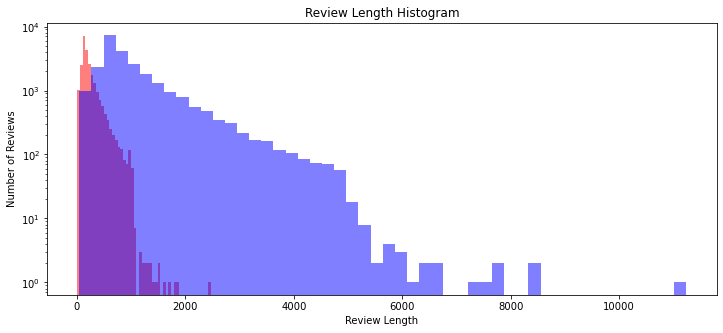

In [13]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

지금 데이터를 통해 보고자 하는 내용은 문장에 대한 길이 분포다.
빨간색 히스토그램은 단어 개수에 대한 히스토그램이고, 파란색은 알파벳 개수의 히스토그램이다.
단어 단위와 알파벳의 전체적인 분포를 시각적으로 볼 수 있으며 이상치 값을 확인할 수 있다.
이상치 값을 어떻게 처리하는지는 캐글 도전 과제를 풀 때 살펴보겠다.

그다음으로 데이터 분포를 통계치로 수치화해보자.

In [14]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


단어 길이에 대한 통계값은 전체적으로 8가지로 볼수 있다.
최대 길이, 최소 길이, 평균 길이, 길이 표준편차, 중간 길이, 1,3 사분위 지점에 대한 값을 확인할 수 있다.
여기서 사분위 지점은 전체 데이터에서 1/4, 3/4 지점을 말한다.
이러한 통곗값을 통해 수치적으로 데이터 문장 길이의 분포를 확인할 수 있다.

다음으로 박스 플롯으로 데이터를 시각화해 보자.
박스 플롯은 직관적인 시각화를 제공한다.
문장 내 단어 수와 문장에 알파벳 개수를 각각 따로 박스 플롯으로 만들어 보겠다.

{'whiskers': [<matplotlib.lines.Line2D at 0x293186820>,
 'caps': [<matplotlib.lines.Line2D at 0x293186e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x293186340>],
 'medians': [<matplotlib.lines.Line2D at 0x29318f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29318fd00>],
 'means': [<matplotlib.lines.Line2D at 0x29318f970>]}

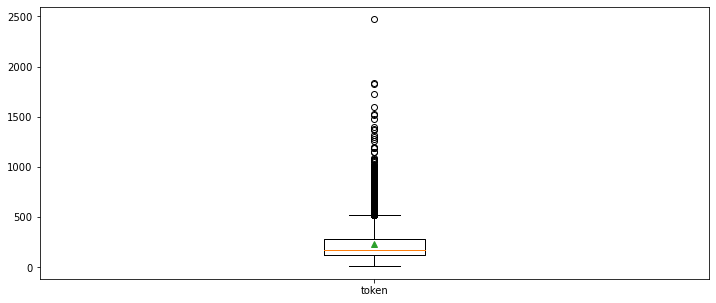

In [15]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

박스 플롯은 다양한 값을 한눈에 직관적으로 볼 수 있다는 장점이 있다.
위의 그림을 크게 해서 어떤 값이 있는지 보겠다.

<img src="확대된박스플롯.png" alt="확대된박스플롯" style="width: 500px"/>

위 그림을 보면 앞에서 수치화했던 다양한 값들을 박스 플롯을 통해 볼 수 있고,
전체적인 데이터의 분포르 확인할 수 있다.
또한 박스 플롯을 통해 이상치가 심한 데이터를 확인할 수 있다.

문장의 알파벳 개수를 나타내는 박스 플롯을 만들어 보자.

{'whiskers': [<matplotlib.lines.Line2D at 0x2931d5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2931e3340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2931d5850>],
 'medians': [<matplotlib.lines.Line2D at 0x2931e3a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2931ef1c0>],
 'means': [<matplotlib.lines.Line2D at 0x2931e3df0>]}

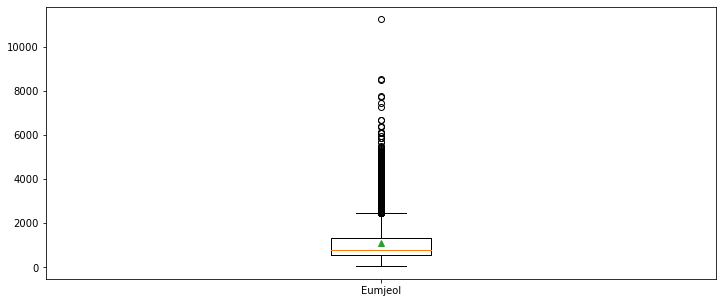

In [16]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

이 박스 플롯을 통해서도 이전과 유사하게 이상치가 심한 데이터를 확인할 수 있다.
이상치가 심하면 데이터의 범위가 너무 넒어 학습이 효율적으로 이뤄지지 않는다.

다음으로 워드클라우드로 데이터를 시각화해보자.

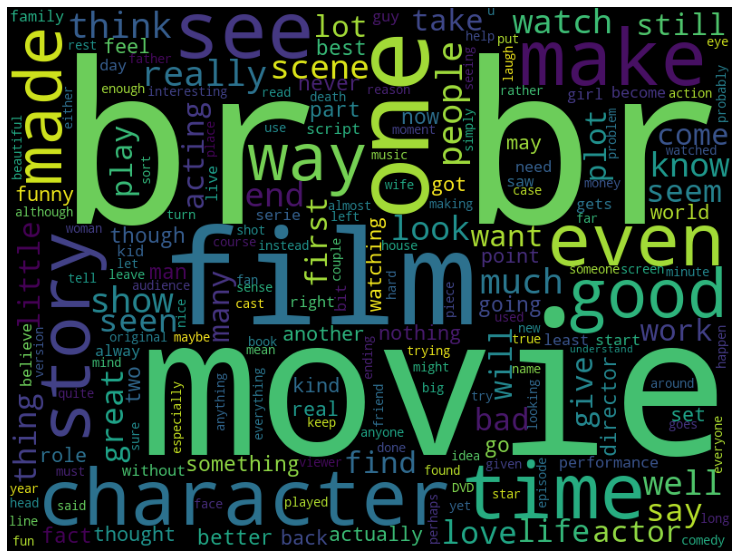

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

보다시피 워드클라우드에서는 데이터에 포함된 단어의 등장 횟수에 따라 단어의 크기가 커지는데, "br"이 엄청 크게 보여진다.
이것은 데이터에 \<br\>과 같은 HTML 태그가 포함돼 있기 때문이다.
이러한 부분은 학습에 도움되지 않으므로 제거해야 하며, 이와 관련된 내용은 다음 장의 전처리 단계에서 다룰 것이다.

마지막으로 긍정 부정의 분포를 확인해 보자.

/Users/imgeunseog/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

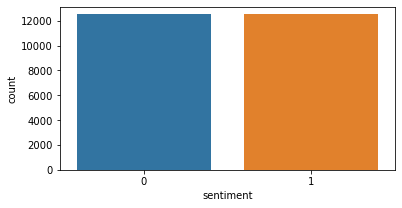

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])

긍정과 부정의 개수가 12,000로 같다.
이것은 데이터의 균현이 아주 좋다는 것을 나타낸다.
하지만 앞으로 만나게 될 데이터가 모두 이렇게 좋은 균형을 유지하지는 않을 것이다.
균형이 좋지 않은 데이터를 어떻게 처리하는지는 다다음 장에서 살펴보겠다.

이로써 이후로 나올 텍스트 분류, 텍스트 유사도, 챗봇을 실습하기 위한 준비가 모두 끝났다.
다음장부터는 지금까지 배운 내용을 토대로 더 깊이 있는 학습을 본격적으로 시작하겠다.